<hr>

<h3> 📌 Importação dos Dados

Nesta etapa, foi realizado o download e definição do caminho (path) onde os arquivos .CSV estão armazenados. A partir disso, foi feita a leitura dos arquivos e a criação dos DataFrames que serão utilizados nas análises subsequentes.

<hr>

In [1]:
import kagglehub

path = kagglehub.dataset_download("felipesembay/sofascore-and-transfermarkt-football-data")

print("Path to dataset files:", path)

100%|██████████| 3.34M/3.34M [00:00<00:00, 49.3MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/felipesembay/sofascore-and-transfermarkt-football-data/versions/1


In [2]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/root/.cache/kagglehub/datasets/felipesembay/sofascore-and-transfermarkt-football-data/versions/1'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/root/.cache/kagglehub/datasets/felipesembay/sofascore-and-transfermarkt-football-data/versions/1/players_tm.csv
/root/.cache/kagglehub/datasets/felipesembay/sofascore-and-transfermarkt-football-data/versions/1/statistics_game.csv
/root/.cache/kagglehub/datasets/felipesembay/sofascore-and-transfermarkt-football-data/versions/1/performance_tm.csv
/root/.cache/kagglehub/datasets/felipesembay/sofascore-and-transfermarkt-football-data/versions/1/partidas_sofascore.csv
/root/.cache/kagglehub/datasets/felipesembay/sofascore-and-transfermarkt-football-data/versions/1/market_value.csv
/root/.cache/kagglehub/datasets/felipesembay/sofascore-and-transfermarkt-football-data/versions/1/statistics_player.csv


In [3]:
dados_valores_mercado = pd.read_csv('/root/.cache/kagglehub/datasets/felipesembay/sofascore-and-transfermarkt-football-data/versions/1/market_value.csv')
dados_desempenho_jogadores = pd.read_csv('/root/.cache/kagglehub/datasets/felipesembay/sofascore-and-transfermarkt-football-data/versions/1/performance_tm.csv')

<hr>

<h3> 📌 Demonstração Inicial dos DataFrames

Nesta etapa, foram exibidas as primeiras linhas dos principais DataFrames utilizados, com o objetivo de obter uma visão geral das colunas disponíveis, tipos de dados e estrutura das informações presentes, facilitando o entendimento e o planejamento das etapas seguintes da análise.

<hr>

In [4]:
dados_valores_mercado.head()

,x,y,mw,datum_mw,verein,age,wappen,player_id,player_name
0,1.202425e+12,50000.0,€50k,"Feb 8, 2008",Cruzeiro Esporte Clube,18,https://tmssl.akamaized.net//images/wappen/pro...,68097,Rafael
1,1.229036e+12,200000.0,€200k,"Dec 12, 2008",Cruzeiro Esporte Clube,19,NaN,68097,Rafael
2,1.254694e+12,800000.0,€800k,"Oct 5, 2009",Cruzeiro Esporte Clube,20,NaN,68097,Rafael
3,1.271282e+12,600000.0,€600k,"Apr 15, 2010",Cruzeiro Esporte Clube,20,NaN,68097,Rafael
4,1.275775e+12,300000.0,€300k,"Jun 6, 2010",Cruzeiro Esporte Clube,20,NaN,68097,Rafael


In [5]:
dados_desempenho_jogadores.head()

,detailedStatsLink,competitionDescription,logo,nameSeason,possibleGames,gamesPlayed,goalsScored,assists,yellowCards,secondYellowCards,...,minutesPlayedPercent,goalsContributedPercent,goalkeeper,concededGoals,cleanSheets,blockedPenaltyPercent,minutesPlayed,player_id,player_name,player_number
0,/rafael/leistungsdatendetails/spieler/68097/we...,Série A,https://tmssl.akamaized.net//images/logo/norma...,2024,30.0,18.0,0.0,0.0,1.0,0.0,...,60.000000,0.0,True,18.0,7.0,0.0,1620.0,68097,Rafael,23.0
1,/rafael/leistungsdatendetails/spieler/68097/we...,Copa do Brasil,https://tmssl.akamaized.net//images/logo/norma...,2024,6.0,4.0,0.0,0.0,1.0,0.0,...,66.666667,0.0,True,1.0,3.0,0.0,360.0,68097,Rafael,23.0
2,/rafael/leistungsdatendetails/spieler/68097/we...,Supercopa Rei,https://tmssl.akamaized.net//images/logo/norma...,2024,1.0,1.0,0.0,0.0,0.0,0.0,...,100.000000,0.0,True,2.0,0.0,0.0,90.0,68097,Rafael,23.0
3,/rafael/leistungsdatendetails/spieler/68097/we...,Libertadores,https://tmssl.akamaized.net//images/logo/norma...,2024,10.0,10.0,0.0,0.0,0.0,0.0,...,100.000000,0.0,True,4.0,7.0,0.0,900.0,68097,Rafael,23.0
4,/rafael/leistungsdatendetails/spieler/68097/we...,Paulistão A1 - Primeira Fase,https://tmssl.akamaized.net//images/logo/norma...,2024,12.0,10.0,0.0,0.0,1.0,0.0,...,83.333333,0.0,True,12.0,1.0,0.0,900.0,68097,Rafael,23.0


<hr>

<h3>📌 Etapa Inicial da Construção do DataFrame Final

Nesta fase, foram selecionadas e preparadas as informações fundamentais para a construção do DataFrame final. Isso incluiu a identificação do time em que cada jogador iniciou o ano, o valor de mercado mais recente no período analisado e a filtragem dos jogadores que atuaram na Série A, com o objetivo de consolidar uma base confiável para as análises.

<hr>

In [6]:

dados_valores_mercado['datum_mw'] = pd.to_datetime(dados_valores_mercado['datum_mw'])

dados_2024 = dados_valores_mercado[dados_valores_mercado['datum_mw'].dt.year == 2024]

dados_2024 = dados_2024.sort_values(by=['player_id', 'datum_mw'])

df_times_iniciais_2024 = dados_2024.groupby('player_id').first().reset_index()

df_times_iniciais_2024 = df_times_iniciais_2024[['player_id', 'verein']].rename(columns={'verein': 'verein_inicio_2024'})

In [7]:
df_times_iniciais_2024

,player_id,verein_inicio_2024
0,215,Club Libertad Asunción
1,2989,Universidad César Vallejo
2,7966,CA Boca Juniors
3,10471,São Paulo Futebol Clube
4,11111,CA River Plate
...,...,...
2466,1236473,Danubio FC
2467,1238948,Unión La Calera
2468,1249764,Coquimbo Unido
2469,1253317,CA San Lorenzo de Almagro


In [8]:

dados_valores_mercado['datum_mw'] = pd.to_datetime(dados_valores_mercado['datum_mw'])

dados_valores_mercado['ano'] = dados_valores_mercado['datum_mw'].dt.year

dados_valores_mercado = dados_valores_mercado.sort_values(by=['player_id', 'ano', 'datum_mw'])

ultimo_valor_por_ano = dados_valores_mercado.groupby(['player_id', 'ano']).tail(1)

In [9]:
df_ultimo_valor_2024  = ultimo_valor_por_ano[ultimo_valor_por_ano['ano'] == 2024]
df_ultimo_valor_2024

,x,y,mw,datum_mw,verein,age,wappen,player_id,player_name,ano
25158,1.718230e+12,250000.0,€250k,2024-06-13,Club Libertad Asunción,42,https://tmssl.akamaized.net//images/wappen/pro...,215,Roque Santa Cruz,2024
23088,1.716847e+12,100000.0,€100k,2024-05-28,Universidad César Vallejo,40,https://tmssl.akamaized.net//images/wappen/pro...,2989,Paolo Guerrero,2024
25814,1.718143e+12,25000.0,€25k,2024-06-12,CA Boca Juniors,37,https://tmssl.akamaized.net//images/wappen/pro...,7966,Javier García,2024
363,1.718575e+12,350000.0,€350k,2024-06-17,São Paulo Futebol Clube,36,https://tmssl.akamaized.net//images/wappen/pro...,10471,Luiz Gustavo,2024
19676,1.718143e+12,350000.0,€350k,2024-06-12,CA River Plate,33,https://tmssl.akamaized.net//images/wappen/pro...,11111,Ramiro Funes Mori,2024
...,...,...,...,...,...,...,...,...,...,...
27254,1.717970e+12,75000.0,€75k,2024-06-10,Danubio FC,18,https://tmssl.akamaized.net//images/wappen/pro...,1236473,Diego Píriz,2024
25319,1.726697e+12,25000.0,€25k,2024-09-19,Unión La Calera,20,https://tmssl.akamaized.net//images/wappen/pro...,1238948,Michael Maturana,2024
27917,1.718230e+12,650000.0,€650k,2024-06-13,Coquimbo Unido,17,https://tmssl.akamaized.net//images/wappen/pro...,1249764,Martín Mundaca,2024
24058,1.727647e+12,1000000.0,€1.00m,2024-09-30,CA San Lorenzo de Almagro,19,https://tmssl.akamaized.net//images/wappen/pro...,1253317,Santiago Sosa,2024


In [10]:
df_serie_a = dados_desempenho_jogadores[dados_desempenho_jogadores['competitionDescription'] == 'Série A']
df_serie_a

,detailedStatsLink,competitionDescription,logo,nameSeason,possibleGames,gamesPlayed,goalsScored,assists,yellowCards,secondYellowCards,...,minutesPlayedPercent,goalsContributedPercent,goalkeeper,concededGoals,cleanSheets,blockedPenaltyPercent,minutesPlayed,player_id,player_name,player_number
0,/rafael/leistungsdatendetails/spieler/68097/we...,Série A,https://tmssl.akamaized.net//images/logo/norma...,2024,30.0,18.0,0.0,0.0,1.0,0.0,...,60.000000,0.000000,True,18.0,7.0,0.0,1620.0,68097,Rafael,23.0
6,/jandrei/leistungsdatendetails/spieler/512344/...,Série A,https://tmssl.akamaized.net//images/logo/norma...,2024,30.0,12.0,0.0,0.0,0.0,0.0,...,40.000000,0.000000,True,14.0,4.0,0.0,1080.0,512344,Jandrei,93.0
12,/young/leistungsdatendetails/spieler/894532/we...,Série A,https://tmssl.akamaized.net//images/logo/norma...,2024,30.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,True,0.0,0.0,0.0,0.0,894532,Young,50.0
15,/nahuel-ferraresi/leistungsdatendetails/spiele...,Série A,https://tmssl.akamaized.net//images/logo/norma...,2024,30.0,14.0,1.0,1.0,2.0,0.0,...,33.296296,4.878049,False,0.0,0.0,0.0,899.0,466336,Nahuel Ferraresi,32.0
21,/alan-franco/leistungsdatendetails/spieler/503...,Série A,https://tmssl.akamaized.net//images/logo/norma...,2024,30.0,19.0,0.0,1.0,6.0,0.0,...,54.962963,2.439024,False,0.0,0.0,0.0,1484.0,503343,Alan Franco,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4609,/leo-gamalho/leistungsdatendetails/spieler/143...,Série A,https://tmssl.akamaized.net//images/logo/norma...,2024,18.0,1.0,0.0,0.0,0.0,0.0,...,0.987654,0.000000,False,0.0,0.0,0.0,16.0,143817,Léo Gamalho,99.0
5371,/fabricio-bustos/leistungsdatendetails/spieler...,Série A,https://tmssl.akamaized.net//images/logo/norma...,2024,16.0,11.0,1.0,1.0,4.0,0.0,...,60.138889,14.285714,False,0.0,0.0,0.0,866.0,275381,Fabricio Bustos,21.0
6518,/luciano-gimenez/leistungsdatendetails/spieler...,Série A,https://tmssl.akamaized.net//images/logo/norma...,2024,16.0,6.0,0.0,0.0,0.0,0.0,...,4.861111,0.000000,False,0.0,0.0,0.0,70.0,985755,Luciano Giménez,23.0
7275,/gary-medel/leistungsdatendetails/spieler/6088...,Série A,https://tmssl.akamaized.net//images/logo/norma...,2024,7.0,2.0,0.0,0.0,0.0,0.0,...,17.301587,0.000000,False,0.0,0.0,0.0,109.0,60889,Gary Medel,5.0


<hr>

<h3>📌 Junção dos DataFrames

Após o preparo individual de cada conjunto de dados, os DataFrames foram interligados por meio da coluna player_id, que representa o identificador único de cada jogador. Essa junção permitiu reunir, em um único DataFrame, as informações sobre o time inicial de 2024, o valor de mercado final no ano e a participação na Série A, consolidando a base final para as análises estatísticas.

<hr>

In [11]:

df_temp = pd.merge(df_serie_a, df_ultimo_valor_2024, on='player_id', how='inner')

df_final = pd.merge(df_temp, df_times_iniciais_2024, on='player_id', how='inner')

In [12]:
times_serie_a_2024 = [
    'São Paulo Futebol Clube', 'Sport Club Corinthians Paulista', 'Club Athletico Paranaense',
    'Criciúma Esporte Clube', 'Fortaleza Esporte Clube', 'Botafogo de Futebol e Regatas',
    'Clube de Regatas Vasco da Gama', 'Grêmio Foot-Ball Porto Alegrense', 'Esporte Clube Juventude',
    'Sport Club Internacional', 'Fluminense Football Club', 'Atlético Clube Goianiense',
    'Esporte Clube Bahia', 'Red Bull Bragantino', 'Sociedade Esportiva Palmeiras', 'CR Flamengo',
    'Cuiabá Esporte Clube (MT)', 'Clube Atlético Mineiro', 'Esporte Clube Vitória', 'Cruzeiro Esporte Clube'
]

def definir_time_final(row):
    if row['verein'] in times_serie_a_2024:
        return row['verein']
    elif row['verein_inicio_2024'] in times_serie_a_2024:
        return row['verein_inicio_2024']
    else:
        return None

df_final['time_final'] = df_final.apply(definir_time_final, axis=1)

df_final.drop(columns=['verein', 'verein_inicio_2024'], inplace=True)

In [13]:
df_final

,detailedStatsLink,competitionDescription,logo,nameSeason,possibleGames,gamesPlayed,goalsScored,assists,yellowCards,secondYellowCards,...,player_number,x,y,mw,datum_mw,age,wappen,player_name_y,ano,time_final
0,/rafael/leistungsdatendetails/spieler/68097/we...,Série A,https://tmssl.akamaized.net//images/logo/norma...,2024,30.0,18.0,0.0,0.0,1.0,0.0,...,23.0,1.718575e+12,800000.0,€800k,2024-06-17,34,https://tmssl.akamaized.net//images/wappen/pro...,Rafael,2024,São Paulo Futebol Clube
1,/jandrei/leistungsdatendetails/spieler/512344/...,Série A,https://tmssl.akamaized.net//images/logo/norma...,2024,30.0,12.0,0.0,0.0,0.0,0.0,...,93.0,1.718575e+12,400000.0,€400k,2024-06-17,31,https://tmssl.akamaized.net//images/wappen/pro...,Jandrei,2024,São Paulo Futebol Clube
2,/young/leistungsdatendetails/spieler/894532/we...,Série A,https://tmssl.akamaized.net//images/logo/norma...,2024,30.0,0.0,0.0,0.0,0.0,0.0,...,50.0,1.718575e+12,100000.0,€100k,2024-06-17,22,https://tmssl.akamaized.net//images/wappen/pro...,Young,2024,São Paulo Futebol Clube
3,/nahuel-ferraresi/leistungsdatendetails/spiele...,Série A,https://tmssl.akamaized.net//images/logo/norma...,2024,30.0,14.0,1.0,1.0,2.0,0.0,...,32.0,1.721340e+12,3500000.0,€3.50m,2024-07-19,25,https://tmssl.akamaized.net//images/wappen/pro...,Nahuel Ferraresi,2024,São Paulo Futebol Clube
4,/alan-franco/leistungsdatendetails/spieler/503...,Série A,https://tmssl.akamaized.net//images/logo/norma...,2024,30.0,19.0,0.0,1.0,6.0,0.0,...,28.0,1.718575e+12,3000000.0,€3.00m,2024-06-17,27,https://tmssl.akamaized.net//images/wappen/pro...,Alan Franco,2024,São Paulo Futebol Clube
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,/leo-gamalho/leistungsdatendetails/spieler/143...,Série A,https://tmssl.akamaized.net//images/logo/norma...,2024,18.0,1.0,0.0,0.0,0.0,0.0,...,99.0,1.718575e+12,200000.0,€200k,2024-06-17,38,https://tmssl.akamaized.net//images/wappen/pro...,Léo Gamalho,2024,Esporte Clube Vitória
601,/fabricio-bustos/leistungsdatendetails/spieler...,Série A,https://tmssl.akamaized.net//images/logo/norma...,2024,16.0,11.0,1.0,1.0,4.0,0.0,...,21.0,1.718575e+12,7000000.0,€7.00m,2024-06-17,28,https://tmssl.akamaized.net//images/wappen/pro...,Fabricio Bustos,2024,Sport Club Internacional
602,/luciano-gimenez/leistungsdatendetails/spieler...,Série A,https://tmssl.akamaized.net//images/logo/norma...,2024,16.0,6.0,0.0,0.0,0.0,0.0,...,23.0,1.718575e+12,900000.0,€900k,2024-06-17,24,https://tmssl.akamaized.net//images/wappen/pro...,Luciano Giménez,2024,Cuiabá Esporte Clube (MT)
603,/gary-medel/leistungsdatendetails/spieler/6088...,Série A,https://tmssl.akamaized.net//images/logo/norma...,2024,7.0,2.0,0.0,0.0,0.0,0.0,...,5.0,1.718575e+12,400000.0,€400k,2024-06-17,36,https://tmssl.akamaized.net//images/wappen/pro...,Gary Medel,2024,Clube de Regatas Vasco da Gama


<hr>

<h3>📌 Análise dos Dados

Com o DataFrame final consolidado, foram aplicadas funções estatísticas para construção de gráficos que irão facilitar a leitura dos dados do DataFrame.

<hr>

/tmp/ipython-input-14-1284087748.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=estatisticas, x='media', y='time_final', palette='Blues_d')
/tmp/ipython-input-14-1284087748.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=estatisticas, x='mediana', y='time_final', palette='Greens_d')
/tmp/ipython-input-14-1284087748.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=estatisticas, x='moda', y='time_final', palette='Oranges_d')


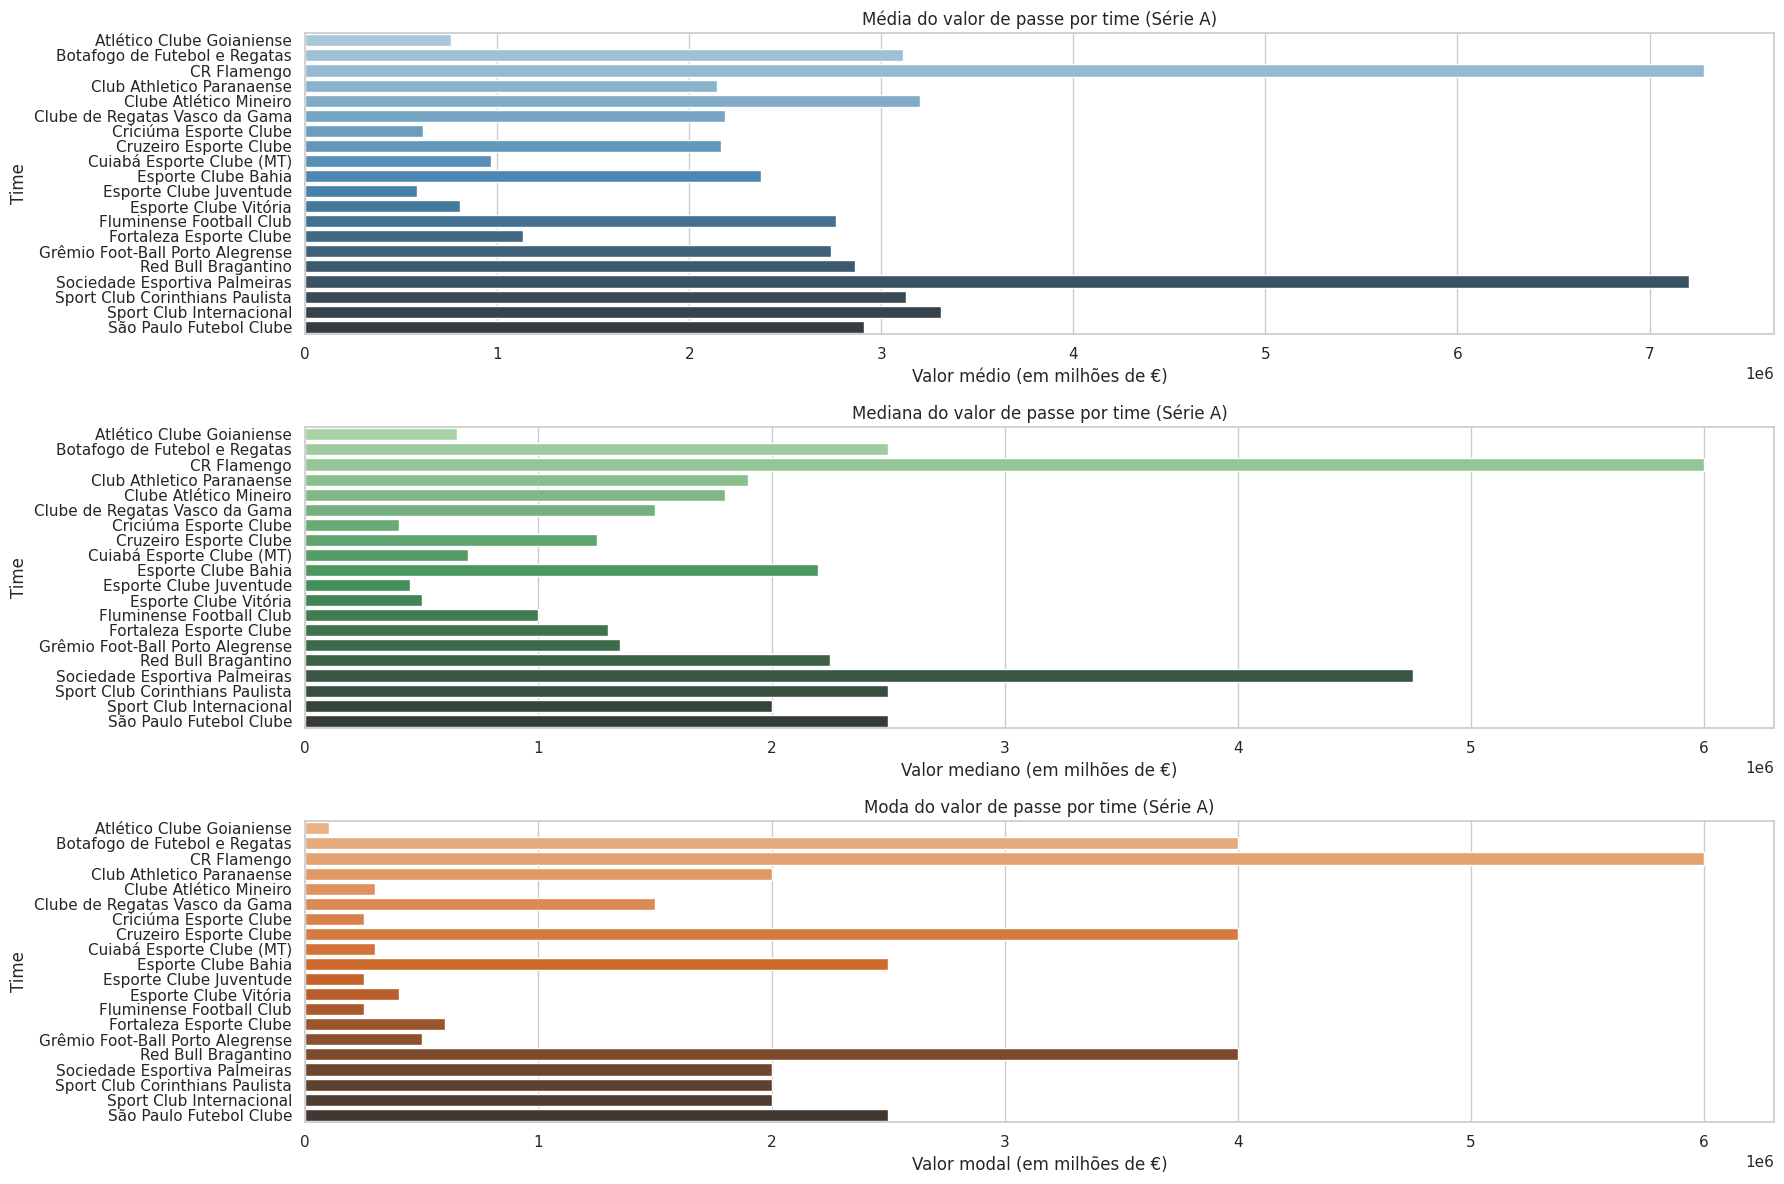

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

df_filtrado = df_final[df_final['time_final'].notna()]

estatisticas = df_filtrado.groupby('time_final')['y'].agg(
    media='mean',
    mediana='median',
    moda=lambda x: stats.mode(x, keepdims=True).mode[0]
).reset_index()

sns.set(style="whitegrid")
plt.figure(figsize=(18, 12))

plt.subplot(3, 1, 1)
sns.barplot(data=estatisticas, x='media', y='time_final', palette='Blues_d')
plt.title('Média do valor de passe por time (Série A)')
plt.xlabel('Valor médio (em milhões de €)')
plt.ylabel('Time')

plt.subplot(3, 1, 2)
sns.barplot(data=estatisticas, x='mediana', y='time_final', palette='Greens_d')
plt.title('Mediana do valor de passe por time (Série A)')
plt.xlabel('Valor mediano (em milhões de €)')
plt.ylabel('Time')

plt.subplot(3, 1, 3)
sns.barplot(data=estatisticas, x='moda', y='time_final', palette='Oranges_d')
plt.title('Moda do valor de passe por time (Série A)')
plt.xlabel('Valor modal (em milhões de €)')
plt.ylabel('Time')

plt.tight_layout()
plt.show()

/tmp/ipython-input-15-4033577736.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_filtrado, x='y', y='time_final', palette='Set3', showfliers=True)


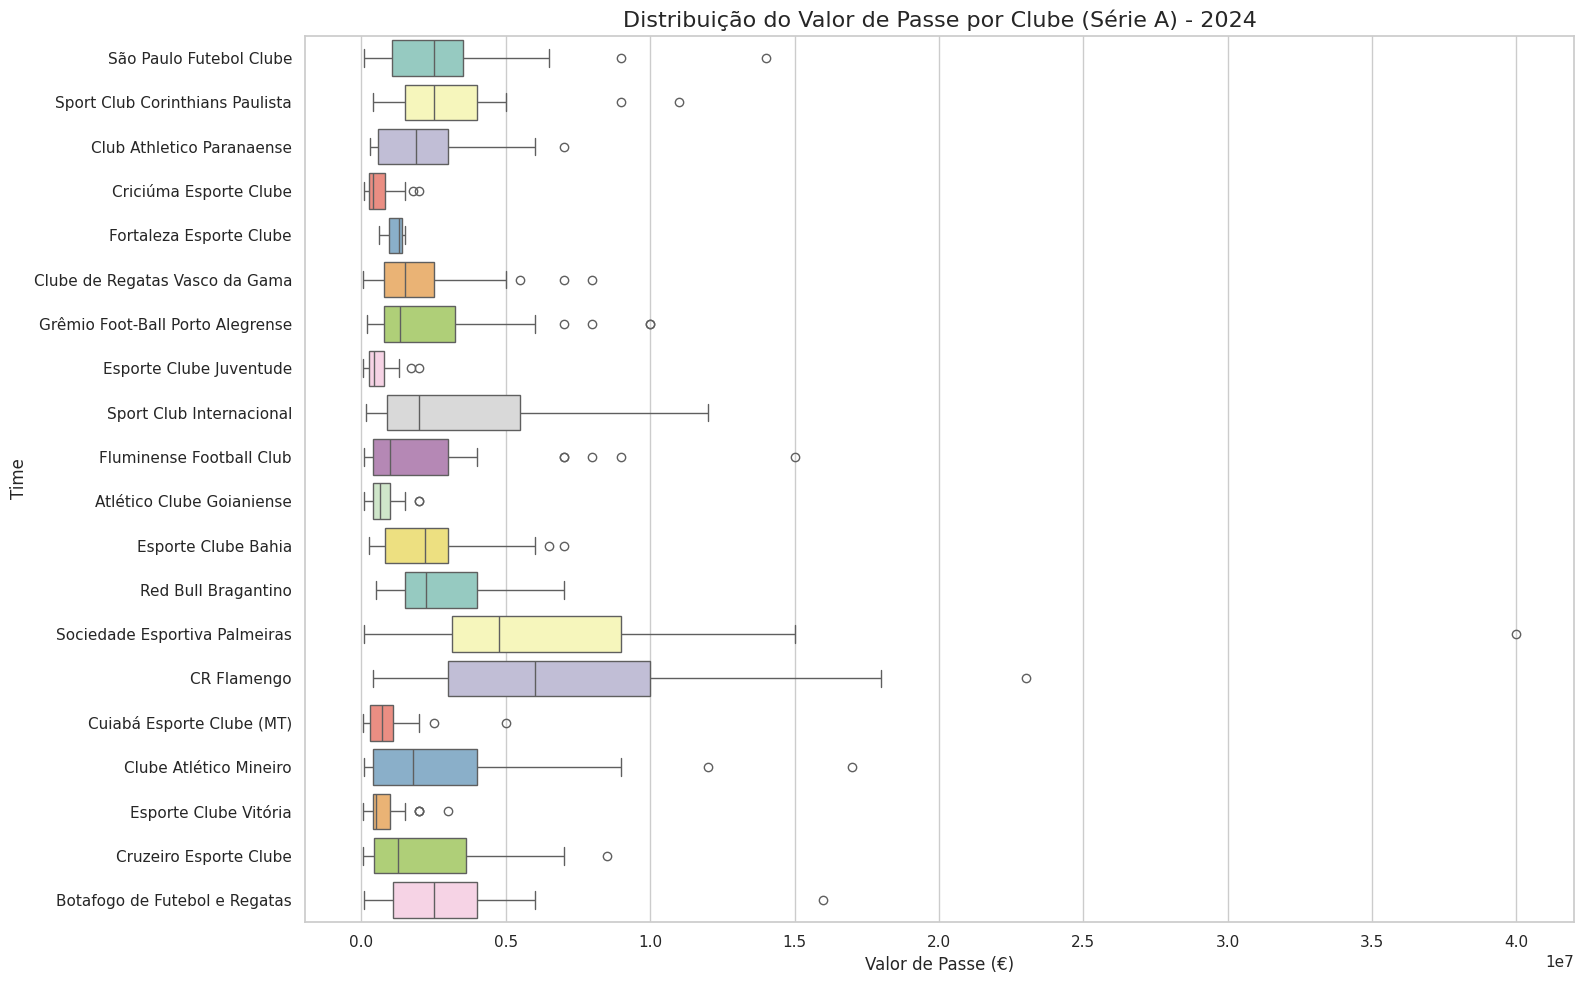

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

df_filtrado = df_final[df_final['time_final'].notna()]

plt.figure(figsize=(16, 10))
sns.set(style="whitegrid")

sns.boxplot(data=df_filtrado, x='y', y='time_final', palette='Set3', showfliers=True)

plt.title('Distribuição do Valor de Passe por Clube (Série A) - 2024', fontsize=16)
plt.xlabel('Valor de Passe (€)', fontsize=12)
plt.ylabel('Time', fontsize=12)

plt.tight_layout()
plt.show()

/tmp/ipython-input-16-2498654292.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_freq, x='Frequência Absoluta', y='Time', palette='Blues_d')
/tmp/ipython-input-16-2498654292.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_freq, x='Frequência Relativa (%)', y='Time', palette='Greens_d')


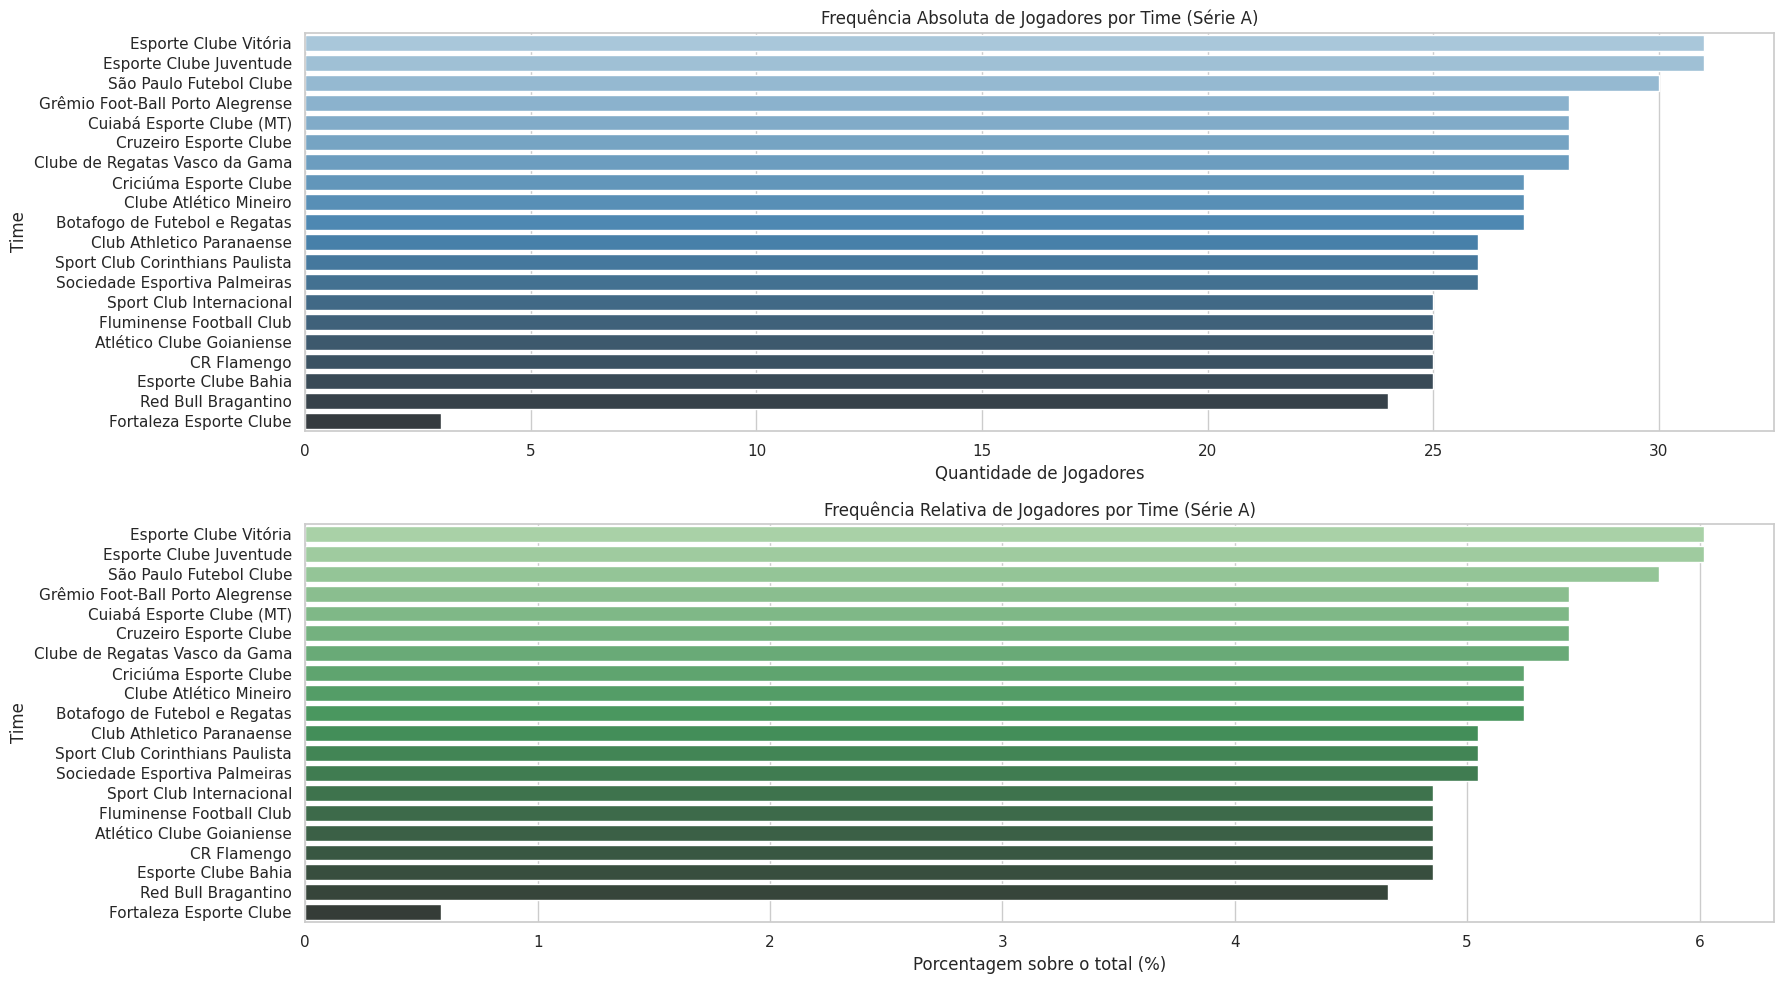

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

df_filtrado = df_final[df_final['time_final'].notna()]

frequencia_abs = df_filtrado['time_final'].value_counts().sort_values(ascending=False)
frequencia_rel = (frequencia_abs / frequencia_abs.sum()) * 100

df_freq = pd.DataFrame({
    'Time': frequencia_abs.index,
    'Frequência Absoluta': frequencia_abs.values,
    'Frequência Relativa (%)': frequencia_rel.values
})

plt.figure(figsize=(18, 10))
sns.set(style="whitegrid")

plt.subplot(2, 1, 1)
sns.barplot(data=df_freq, x='Frequência Absoluta', y='Time', palette='Blues_d')
plt.title('Frequência Absoluta de Jogadores por Time (Série A)')
plt.xlabel('Quantidade de Jogadores')
plt.ylabel('Time')

plt.subplot(2, 1, 2)
sns.barplot(data=df_freq, x='Frequência Relativa (%)', y='Time', palette='Greens_d')
plt.title('Frequência Relativa de Jogadores por Time (Série A)')
plt.xlabel('Porcentagem sobre o total (%)')
plt.ylabel('Time')

plt.tight_layout()
plt.show()

## Dados do fortaleza incompletos

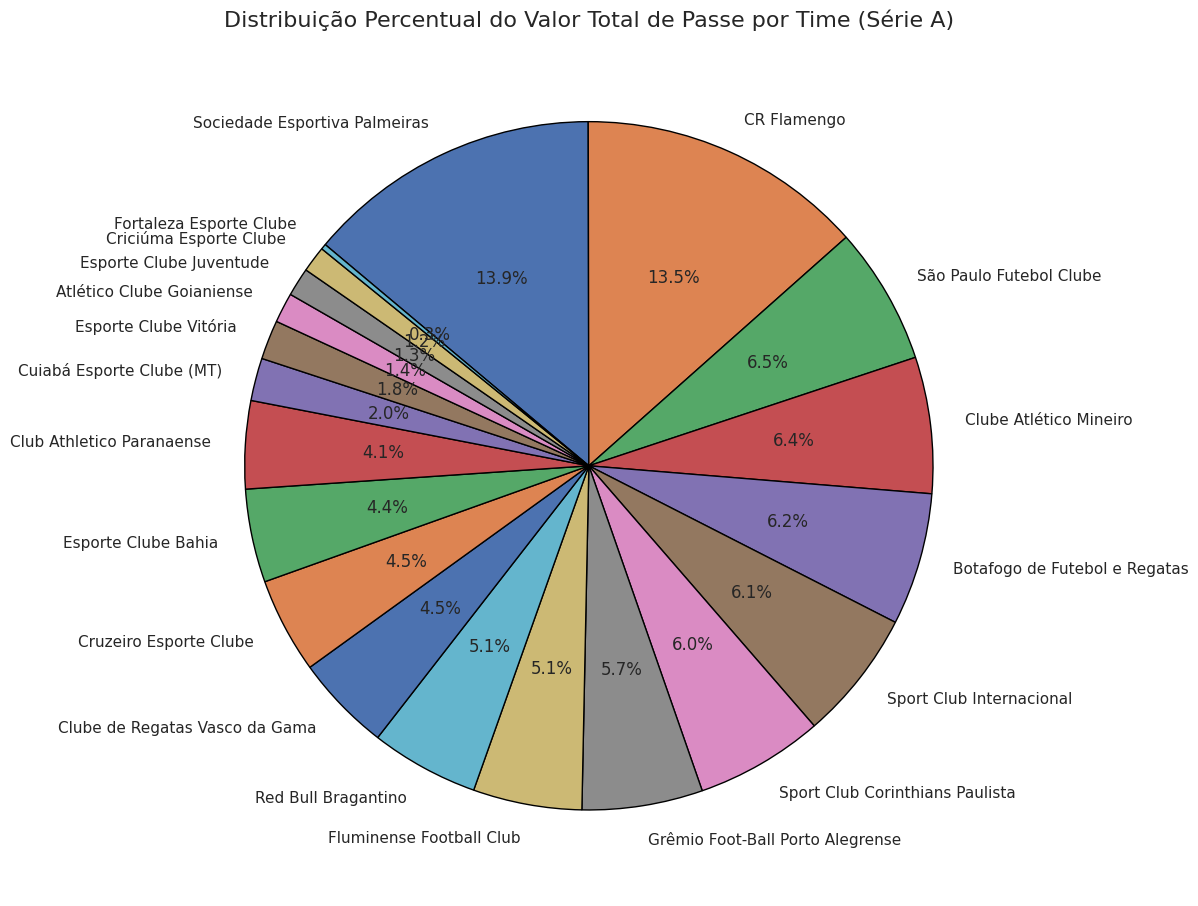

In [17]:
import matplotlib.pyplot as plt

df_filtrado = df_final[df_final['time_final'].notna()]

valor_total = df_filtrado.groupby('time_final')['y'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 12))
plt.pie(
    valor_total,
    labels=valor_total.index,
    autopct='%1.1f%%',
    startangle=140,
    counterclock=False,
    wedgeprops={'edgecolor': 'black'}
)

plt.title('Distribuição Percentual do Valor Total de Passe por Time (Série A)', fontsize=16)
plt.tight_layout()
plt.show()
